In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

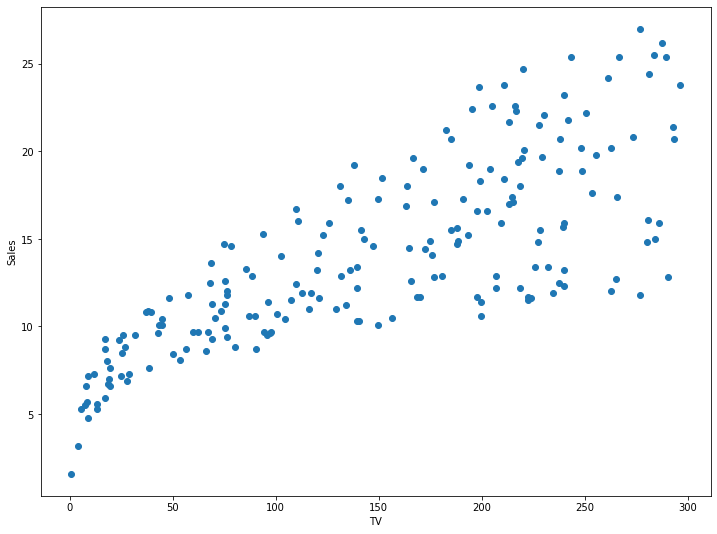

In [7]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 1]
Y = data.iloc[:, 4]
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X, Y)
plt.show()

In [8]:
# Building the model
m = 0
c = 0


L = 0.00001 # The learning Rate
epochs = 50 # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  #
    D_m = (-2/n) * sum(X * (Y - Y_pred))  
    D_c = (-2/n) * sum(Y - Y_pred)  
    m = m - L * D_m  
    c = c - L * D_c 

print (m, c)

0.08323873042694489 0.0022036485248894387


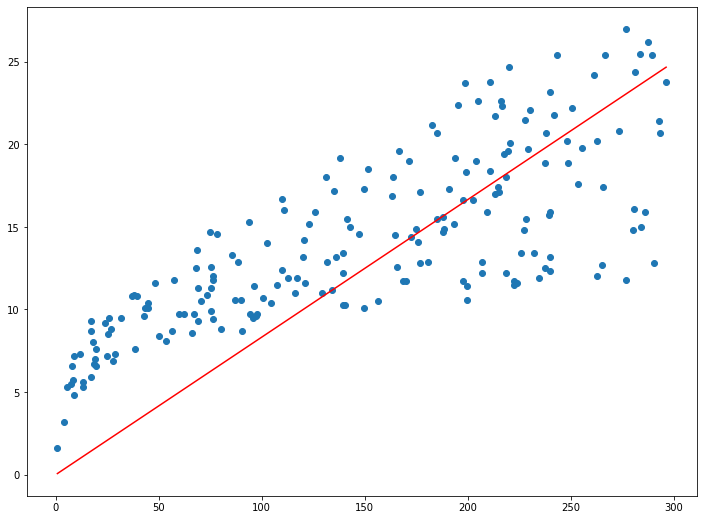

In [9]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()




In [10]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# read data into a DataFrame
dataxx = pd.read_csv('data.csv', index_col=0)
dataxx.pop('Radio')
dataxx.pop('Newspaper')
dataxx.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [13]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=dataxx).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [14]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = dataxx[feature_cols]
y = dataxx.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


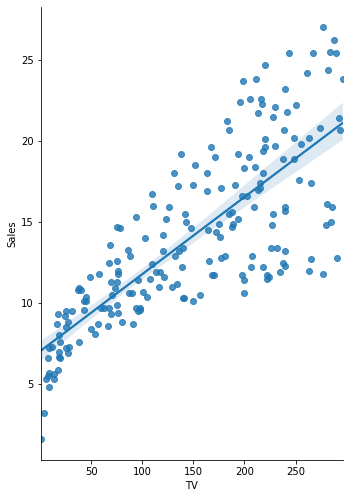

In [15]:
sns.pairplot(dataxx, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

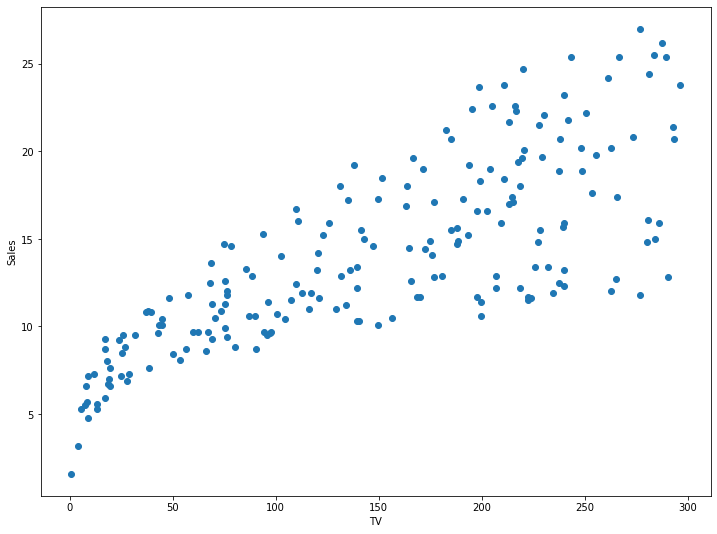

In [16]:
# Preprocessing Input data
XX = dataxx.iloc[:, 0]
YY = dataxx.iloc[:, 1]
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(XX, YY)
plt.show()

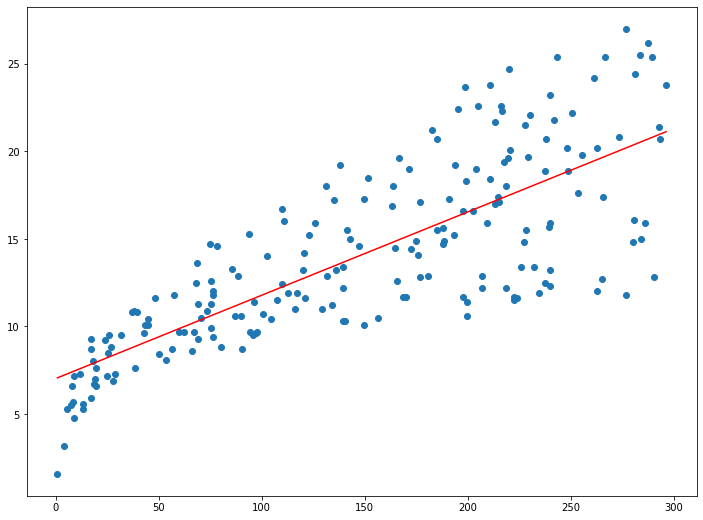

In [17]:
Y_predx = lm2.coef_*XX +  lm2.intercept_
#Y_predx = 0.04753664*XX + 7.032593549127695

plt.scatter(XX, YY) 
plt.plot([min(XX), max(XX)], [min(Y_predx), max(Y_predx)], color='red')  # regression line
plt.show()
